# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Data 

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [4]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


# EDA 

In [8]:
client_df.replace({'MISSING':np.NaN , 't' : 1 , 'f' : 0} , inplace = True)

In [9]:
def Information (df) :
        df.replace('?' , np.nan , inplace = True )
        nulls = (df.shape[0] - df.dropna(axis = 0).shape[0])
        nulls_per = (df.shape[0] - df.dropna(axis = 0).shape[0]) / df.shape[0]
        dup , dup_per = df.duplicated().sum() , (df.duplicated().sum()) / df.shape[0]
        numerical_columns = list((df.select_dtypes(include=np.number)).columns)
        categorical_columns = list(df.select_dtypes(include = ['object']).columns)
        numerical_col_dict = {}
        for col in numerical_columns :
            if df[col].nunique() > 10 :
                numerical_col_dict[col] = 'Continuous' 

            else :
                numerical_col_dict[col] = 'Discrete'
        categorical_col_dict = {}
        for col in categorical_columns :
            if df[col].nunique() > 10 :
                categorical_col_dict[col] = 'Continuous' 

            else :
                categorical_col_dict[col] = 'Classes'
        x = []
        for col in df.columns : 
            x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum(),int((df[col].isna().sum())/df.shape[0] * 100)  ])

        x = pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls','Nulls %'])
        
        print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
        print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
        print('\n','Numerical Columns : {}'.format(numerical_col_dict))
        print('\n','Categorical Columns : {}'.format(categorical_col_dict))
        
        return x

In [10]:
Information(client_df)


 There is : 3775  Nulls, Representing 0.26 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'cons_12m': 'Continuous', 'cons_gas_12m': 'Continuous', 'cons_last_month': 'Continuous', 'forecast_cons_12m': 'Continuous', 'forecast_cons_year': 'Continuous', 'forecast_discount_energy': 'Continuous', 'forecast_meter_rent_12m': 'Continuous', 'forecast_price_energy_off_peak': 'Continuous', 'forecast_price_energy_peak': 'Continuous', 'forecast_price_pow_off_peak': 'Continuous', 'has_gas': 'Discrete', 'imp_cons': 'Continuous', 'margin_gross_pow_ele': 'Continuous', 'margin_net_pow_ele': 'Continuous', 'nb_prod_act': 'Discrete', 'net_margin': 'Continuous', 'num_years_antig': 'Continuous', 'pow_max': 'Continuous', 'churn': 'Discrete'}

 Categorical Columns : {'id': 'Continuous', 'channel_sales': 'Classes', 'date_activ': 'Continuous', 'date_end': 'Continuous', 'date_modif_prod': 'Continuous', 'date_renewal': 'Continuous', 'origin_up': 'Classes'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,id,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc...",14606,object,0,0
1,channel_sales,"[foosdfpfkusacimwkcsosbicdxkicaua, nan, lmkeba...",7,object,3725,25
2,cons_12m,"[0, 4660, 544, 1584, 4425, 8302, 45097, 29552,...",11065,int64,0,0
3,cons_gas_12m,"[54946, 0, 1542867, 80583, 41883, 188601, 1868...",2112,int64,0,0
4,cons_last_month,"[0, 526, 1998, 1260, 2188, 3112, 2489, 5280, 3...",4751,int64,0,0
5,date_activ,"[2013-06-15, 2009-08-21, 2010-04-16, 2010-03-3...",1796,object,0,0
6,date_end,"[2016-06-15, 2016-08-30, 2016-04-16, 2016-03-3...",368,object,0,0
7,date_modif_prod,"[2015-11-01, 2009-08-21, 2010-04-16, 2010-03-3...",2129,object,0,0
8,date_renewal,"[2015-06-23, 2015-08-31, 2015-04-17, 2015-03-3...",386,object,0,0
9,forecast_cons_12m,"[0.0, 189.95, 47.96, 240.04, 445.75, 796.94, 8...",13993,float64,0,0


In [11]:
Information(price_df)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'price_off_peak_var': 'Continuous', 'price_peak_var': 'Continuous', 'price_mid_peak_var': 'Continuous', 'price_off_peak_fix': 'Continuous', 'price_peak_fix': 'Continuous', 'price_mid_peak_fix': 'Continuous'}

 Categorical Columns : {'id': 'Continuous', 'price_date': 'Continuous'}


,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,id,"[038af19179925da21a25619c5a24b745, 31f2ce54992...",16096,object,0,0
1,price_date,"[2015-01-01, 2015-02-01, 2015-03-01, 2015-04-0...",12,object,0,0
2,price_off_peak_var,"[0.151367, 0.149626, 0.150321, 0.145859, 0.125...",1853,float64,0,0
3,price_peak_var,"[0.0, 0.103395, 0.102234, 0.10524, 0.101071, 0...",1189,float64,0,0
4,price_mid_peak_var,"[0.0, 0.071536, 0.070375, 0.07515, 0.075096, 0...",711,float64,0,0
5,price_off_peak_fix,"[44.26693116, 44.26692996, 44.44470996, 40.565...",66,float64,0,0
6,price_peak_fix,"[0.0, 24.33958068, 24.43733004, 24.33957804, 2...",31,float64,0,0
7,price_mid_peak_fix,"[0.0, 16.22638872, 16.29155496, 16.22638296, 1...",28,float64,0,0


In [13]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [14]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


# Data Analysis 

In [15]:
# 1. No. of Churn Copmanies

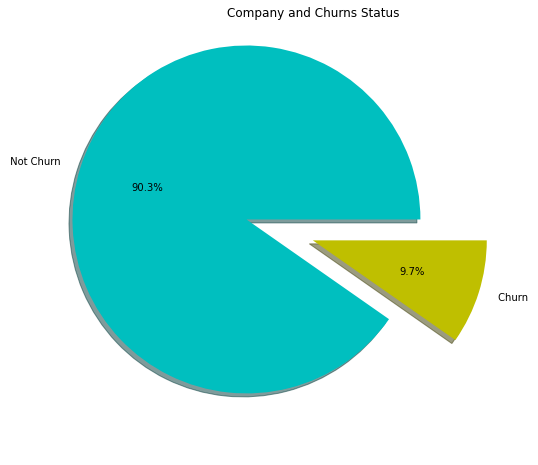

In [19]:
y = [client_df[client_df['churn']==0].shape[0] , client_df[client_df['churn']==1].shape[0]]
mylabels = [" Not Churn " , " Churn "]
myexplode = [0.4, 0]
plt.figure(figsize=(12, 8))
plt.title('Company and Churns Status')
plt.pie(y, labels = mylabels, explode = myexplode , autopct='%1.1f%%' , shadow = True , colors = ['c' , 'y'])
plt.show() 

In [20]:
# 2. Distribution of features and Outliers

In [22]:
def Outliers( df , display = False , drop = False , drop_order = 1 ,columns_to_display = [], columns_to_drop = []) :
        df_copy = df.copy(deep = True)
        numerical_columns = list((df_copy.select_dtypes(include=np.number)).columns)
        if display == True :
            if (len(columns_to_display) != 0) :
                numerical_columns = columns_to_display
            from math import ceil
            x = ceil(len(numerical_columns)/2)
            if len(numerical_columns) >= 24 :
                fig = plt.figure(figsize=(128,96))
            else : 
                fig = plt.figure(figsize=(24, 12))

            sns.set_theme(style="whitegrid", palette="pastel")
            plt.subplots_adjust(hspace=0.5)
            subfigs = fig.subfigures(len(numerical_columns), 1)
            for idx , i in enumerate(numerical_columns) :
                (ax1, ax2) = subfigs[idx].subplots(1, 2)
                sns.boxplot(x = df_copy[i] ,data = df_copy , ax = ax1 )
                sns.histplot(x = df_copy[i], kde=True , ax = ax2 )
                subfigs[idx].subplots_adjust(bottom=0.5, right=0.8, top=0.75)
                ax1.set_title(i)
                ax2.set_title(i)

        if drop == True :
            if (len(columns_to_drop) != 0) :
                numerical_columns = columns_to_drop
            elif drop_order < 1 :
                drop_order = 1

            import scipy.stats as stats

            while drop_order != 0 :
                for col in  numerical_columns :
                    p_value = stats.normaltest(df_copy[col])
                    if p_value[1] >= .05 :                                      ## col is normally distributed
                        filt = (df_copy[col]-df_copy[col].mean())/df_copy[col].std()
                        indexes = (filt[filt > 3]).index
                        df_copy.drop(indexes , inplace = True )
                        df_copy.reset_index(drop=True , inplace=True)

                    else :                                                     ## col is Skewed 

                        q1 = df_copy[col].quantile(0.25)
                        q3 = df_copy[col].quantile(0.75)
                        iqr = q3 - q1
                        lower = q1 - 1.5*iqr
                        if lower < 0 :
                            lower = 0
                        higher = q3 + 1.5*iqr
                        df_copy = df_copy [df_copy[col] >= lower] 
                        df_copy = df_copy [df_copy[col] <= higher ]
                        df_copy.reset_index(drop=True , inplace=True)

                drop_order = drop_order - 1
                
        return df_copy

In [24]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


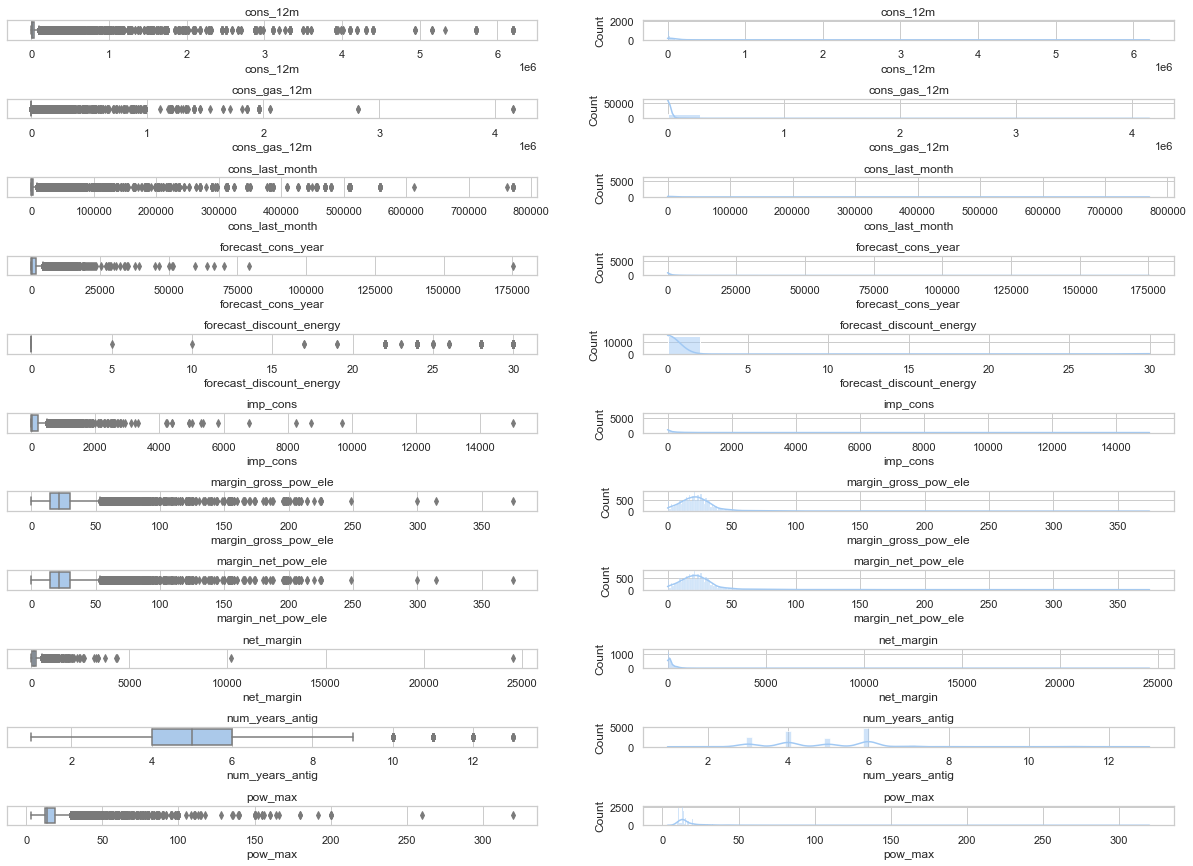

In [26]:
Outliers(client_df,display=True , columns_to_display=['cons_12m','cons_gas_12m','cons_last_month',
                                                     'forecast_cons_year','forecast_discount_energy',
                                                     'imp_cons','margin_gross_pow_ele','margin_net_pow_ele','net_margin',
                                                     'num_years_antig','pow_max'])

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


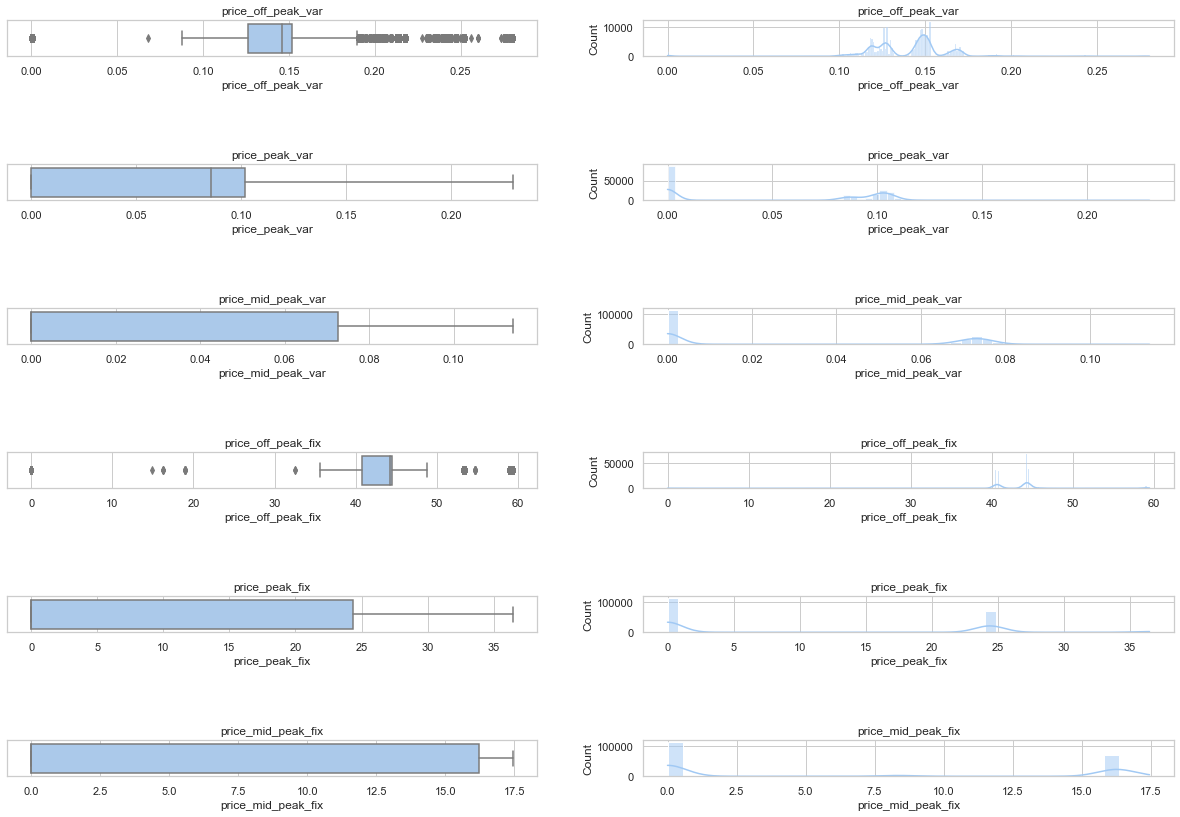

In [27]:
Outliers(price_df , display=True)

In [36]:
#3. Active Date Vs. Churn Status

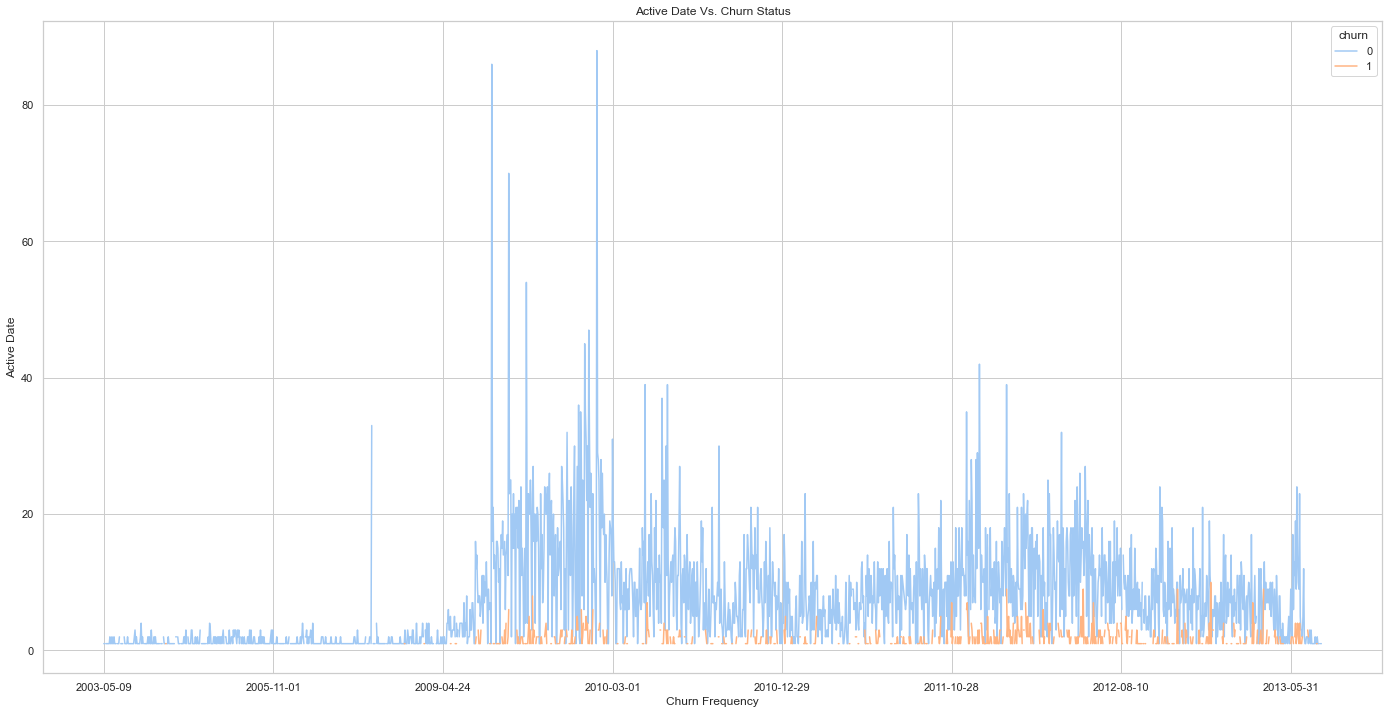

In [38]:
client_df.groupby('date_activ')['churn'].value_counts().unstack().plot(figsize=(24,12))
plt.ylabel('Active Date')
plt.xlabel('Churn Frequency')
plt.title('Active Date Vs. Churn Status')
plt.show();

In [39]:
# Churns appears from 05 - 2009

In [40]:
#3. End Date Vs. Churn Status

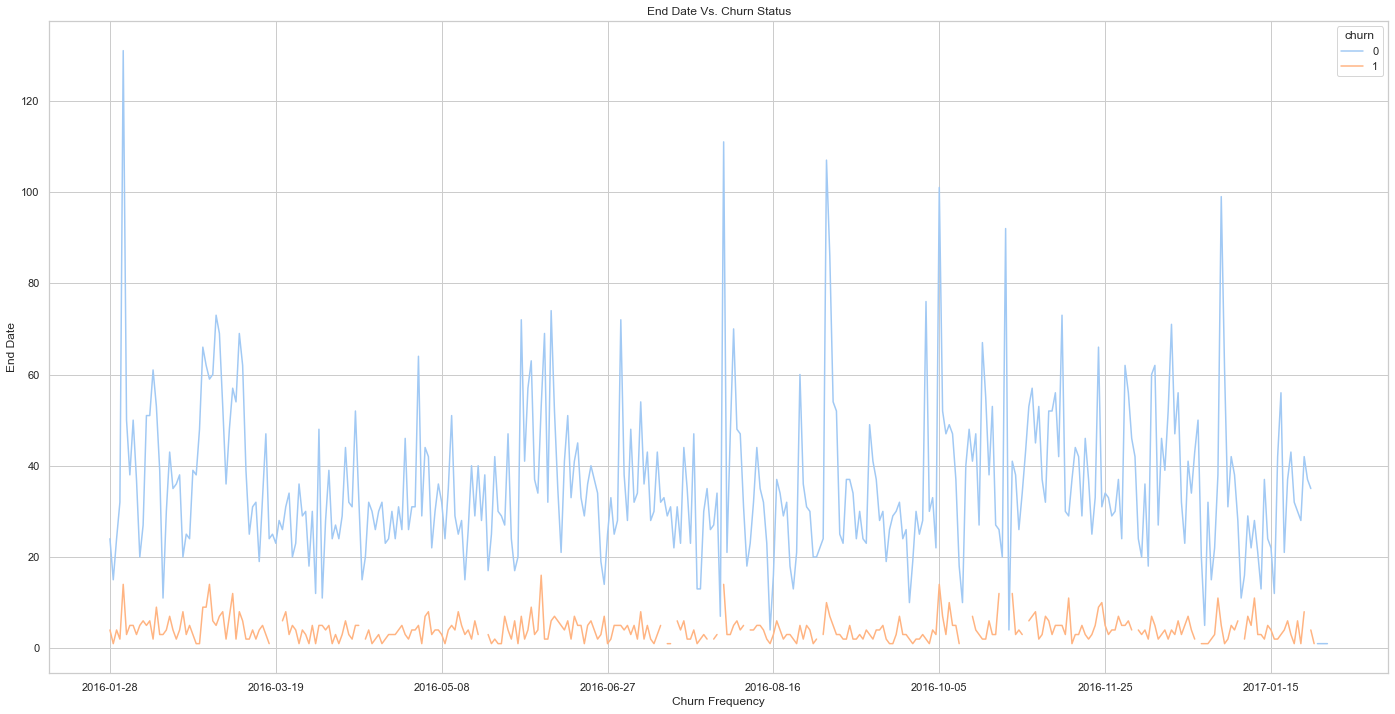

In [41]:
client_df.groupby('date_end')['churn'].value_counts().unstack().plot(figsize=(24,12))
plt.ylabel('End Date')
plt.xlabel('Churn Frequency')
plt.title('End Date Vs. Churn Status')
plt.show();

In [42]:
# Documentation of Data mention column activity new but it's not found

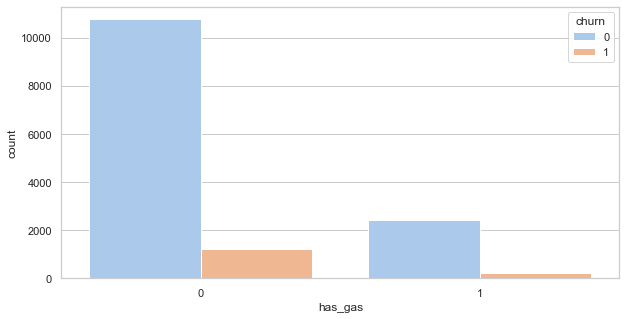

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(client_df['has_gas'] ,hue = client_df['churn'] );

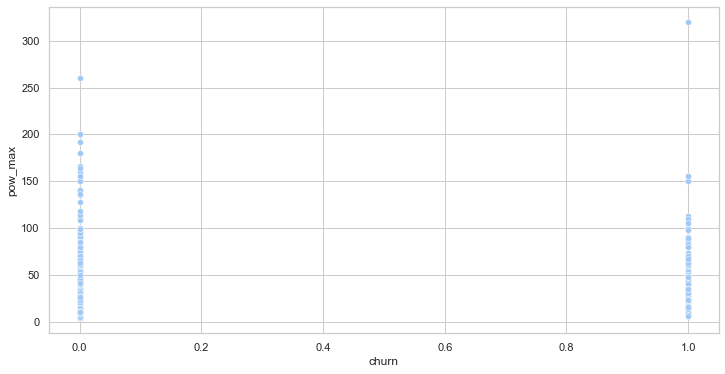

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='pow_max' , x='churn' , data=client_df);

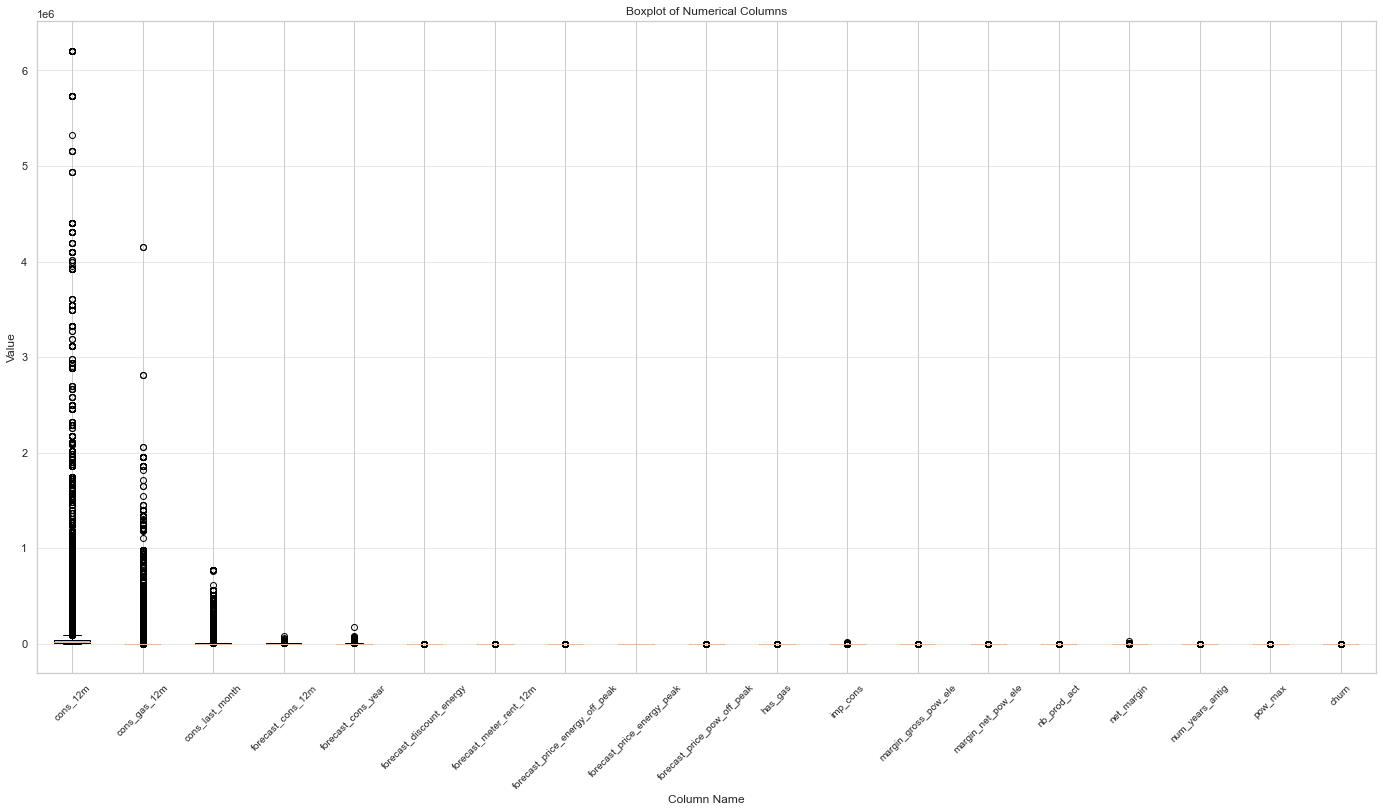

In [60]:
numerical_columns = list(client_df.select_dtypes(include=np.number).columns)
fig, ax = plt.subplots(figsize=(24, 12))
ax.boxplot(client_df[numerical_columns].values, patch_artist=True)
ax.set_xticklabels(numerical_columns, rotation=45, fontsize=10)
ax.set_title('Boxplot of Numerical Columns')
ax.set_xlabel('Column Name')
ax.set_ylabel('Value')

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()


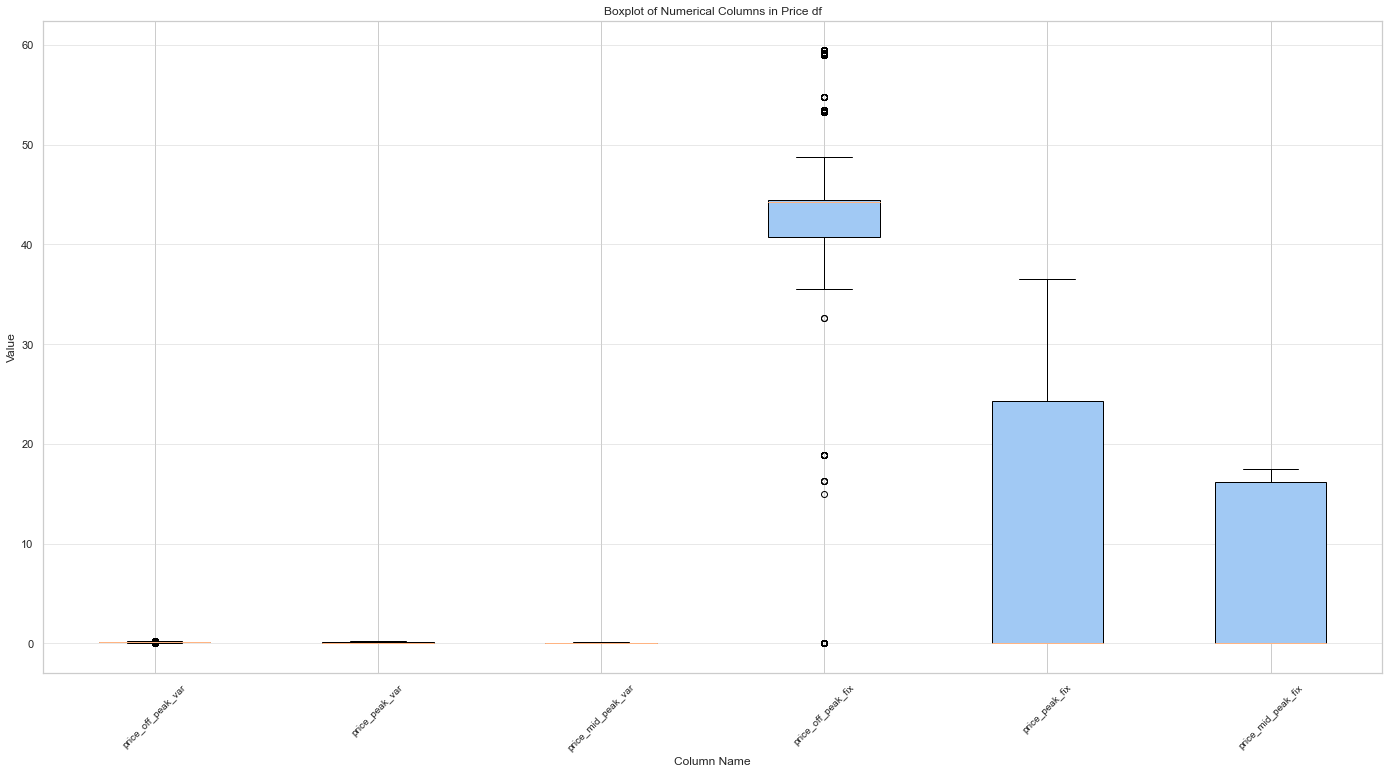

In [65]:
numerical_columns = list(price_df.select_dtypes(include=np.number).columns)
fig, ax = plt.subplots(figsize=(24, 12))
ax.boxplot(price_df[numerical_columns].values, patch_artist=True)
ax.set_xticklabels(numerical_columns, rotation=45, fontsize=10)
ax.set_title('Boxplot of Numerical Columns in Price df')
ax.set_xlabel('Column Name')
ax.set_ylabel('Value')

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()


In [75]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


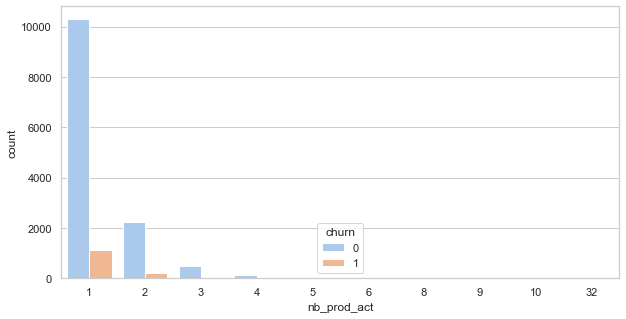

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(client_df['nb_prod_act'] ,hue = client_df['churn'] );

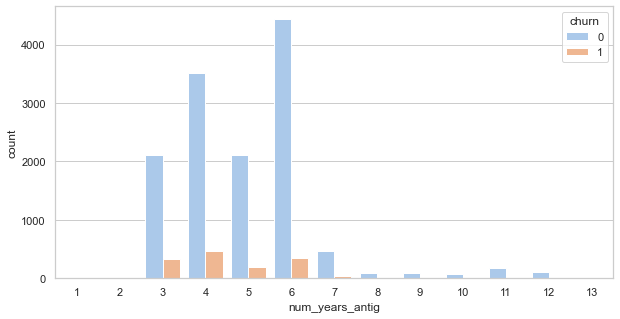

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(client_df['num_years_antig'] ,hue = client_df['churn'] );

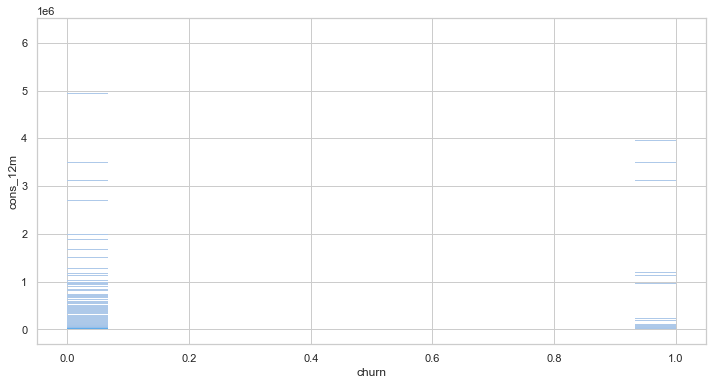

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(y='cons_12m' , x='churn' , data=client_df);

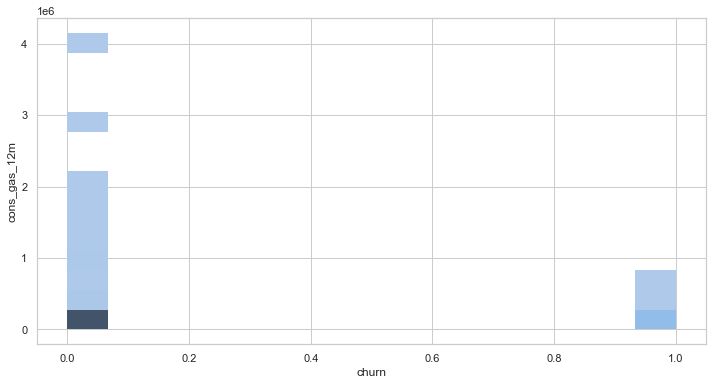

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(y='cons_gas_12m' , x='churn' , data=client_df);

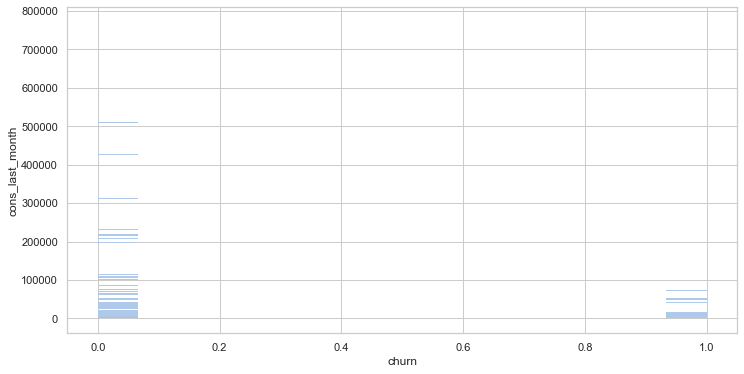

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(y='cons_last_month' , x='churn' , data=client_df);

In [94]:
price_df.groupby('id')[price_df.columns[1:]].mean()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


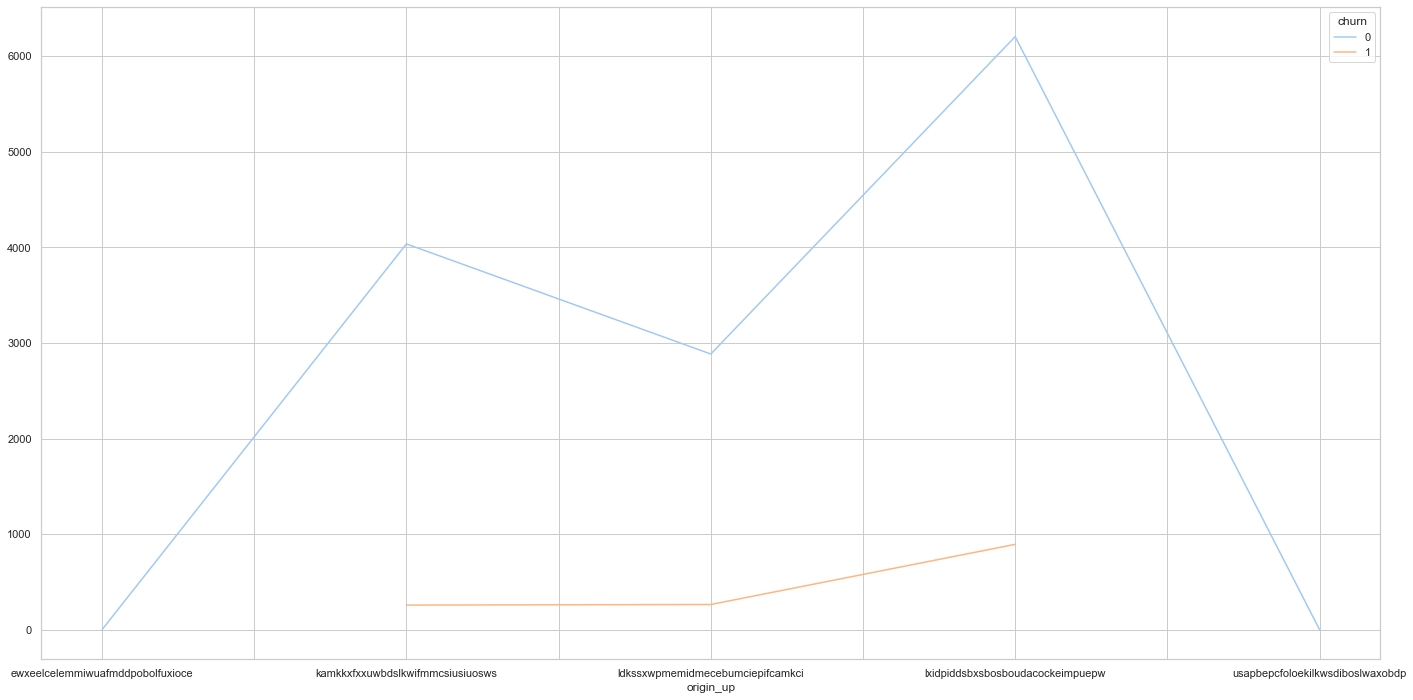

In [99]:
client_df.groupby('origin_up')['churn'].value_counts().unstack().plot(figsize=(24,12));

In [101]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', nan,
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [103]:
# origin ups 'ewxeelcelemmiwuafmddpobolfuxioce' and 'usapbepcfoloekilkwsdiboslwaxobdp' not registered any churn status
# 'lxidpiddsbxsbosboudacockeimpuepw' is the most